In [1]:
# Let's work with the MNIST dataset (09/08/23)

from sklearn.datasets import fetch_openml
mnist=fetch_openml('mnist_784', version=1)
mnist.keys()

/home/dankcoder/Storage/Code/ml/.venv/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
# let's take a look at what data we have
mnist.data.head(5)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# Let's seperate the data and labels
X,Y = mnist["data"], mnist["target"]

In [4]:
# We have 784 Pixels(28x28) and 70,000 images
X.shape

(70000, 784)

In [5]:
# 70,000 labels, each corresponding to each image
Y.shape

(70000,)

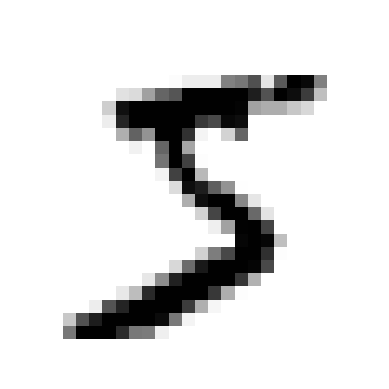

In [6]:
# Let's see what the images look like
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Apply seaborn theme
sns.set_theme()

some_digit = X.iloc[0].to_numpy()
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [7]:
# Looking at the labels, the image above is '5'
Y.iloc[0]

'5'

In [8]:
# Since the labels are strings, we need to cast them as integers to be used in models
import numpy as np
y=Y.astype(np.uint8)

In [9]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [10]:
from sklearn.linear_model import SGDClassifier #Stochastic Gradient Descent

# Let's built a filter to classify 3's and non 3's
y_train_3 = (y_train == 3) # True for all 3s, False for all other digits
y_test_3 = (y_test == 3)


sgd_clf=SGDClassifier(random_state=2) # Setting state allows to reproduce predictions
sgd_clf.fit(X_train, y_train_3)

SGDClassifier(random_state=2)

In [11]:
sgd_clf.predict([X.iloc[0]])

/home/dankcoder/Storage/Code/ml/.venv/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([False])

In [12]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_3, cv=3, scoring="accuracy")

array([0.945  , 0.8951 , 0.96455])

In [13]:
from sklearn.base import BaseEstimator
class Never3Classifier(BaseEstimator):
    def fit(self, X, y=None):
        return self
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [14]:
never_3_clf = Never3Classifier()
cross_val_score(never_3_clf, X_train, y_train_3, cv=3, scoring="accuracy")

array([0.8962 , 0.89975, 0.8975 ])

In [15]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_3, cv=3)

In [16]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_3, y_train_pred)

array([[50878,  2991],
       [  916,  5215]])

In [17]:
# Model was correct only 65% of the time
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_3, y_train_pred)

0.6355106019985377

In [18]:
# Model Detected only 85% of all 3's correctly
recall_score(y_train_3, y_train_pred)

0.8505953351818627

In [19]:
# A more meaningful scoring system is F1 Score
# F1 score is the harmonic mean of precision and recall score

from sklearn.metrics import f1_score
f1_score(y_train_3, y_train_pred)

0.7274883169421776

[11460.15523063]


/home/dankcoder/Storage/Code/ml/.venv/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


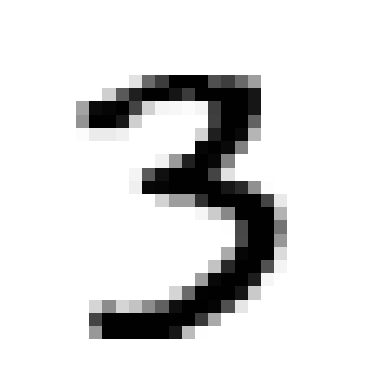

In [20]:
# We can further get the decision values 
y_scores = sgd_clf.decision_function([X.iloc[10000]])
print(y_scores)

plt.imshow(X.iloc[10000].to_numpy().reshape(28,28), cmap="binary")
plt.axis("off")
plt.show()

In [21]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_3, cv=3,
method="decision_function")

In [22]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_3, y_scores)

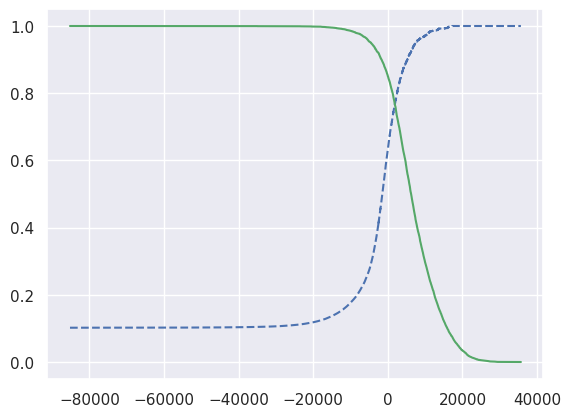

In [23]:
# sns.relplot(x=precisions, y=thresholds, kind="line")# Missing fields???
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()